This is the code I used to filter out the relevant columns for the VA educational attainment data. I also used Greg's cleaned up mobility data (and 7 day running averages) to find the maximum mobility change for each county (fips code). I added these to the ed data frame using the fips code as the join key.

-Mariska (3/9/22)

In [79]:
import pandas as pd

#import the original data set
ed_data = pd.read_csv("EAG_Educational_Attainment_by_Locality.csv")

In [80]:
#view the original data set
ed_data.head()

,Locality,locality_fips,state_name,state_fips,rural_or_non_rural_flag,pct_no_high_school_diploma_loc,cnt_no_high_school_diploma_loc,pct_high_school_grad_loc,cnt_total_high_school_grad_loc,pct_total_high_school_grad_loc,...,pct_high_school_grad_Hispanic_loc,pct_bachelors_degree_Caucasian_loc,pct_bachelors_degree_Black_loc,pct_bachelors_degree_Asian_loc,pct_bachelors_degree_Hispanic_loc,pct_poverty_education_no_high_school_loc,pct_poverty_education_high_school_loc,pct_poverty_education_bachelors_or_higher_loc,pct_pursuing_HighEd_All,cnt_pursuing_HighEd_All
0,Surry,51181,Virginia,51,Non-Rural,0.154303,832,0.371662,4560,0.845697,...,0.878,0.225,0.177,0.000,0.293,0.245,0.150,0.052,0.66,39
1,Clarke,51043,Virginia,51,Non-Rural,0.106878,1223,0.297387,10220,0.893122,...,0.751,0.333,0.278,0.149,0.155,0.161,0.102,0.025,0.75,131
2,Mecklenburg,51117,Virginia,51,Rural,0.180888,4507,0.328303,20409,0.819112,...,0.697,0.256,0.107,0.130,0.122,0.322,0.185,0.070,0.65,186
3,Augusta,51015,Virginia,51,Rural,0.129816,7881,0.392281,52828,0.870184,...,0.571,0.236,0.053,0.707,0.114,0.163,0.092,0.030,0.58,413
4,Goochland,51075,Virginia,51,Non-Rural,0.095134,1789,0.242382,17016,0.904866,...,0.830,0.474,0.148,0.761,0.308,0.105,0.083,0.026,0.66,142


In [81]:
#create a new dataframe with selected columns

ed_new = ed_data[['Locality','locality_fips','rural_or_non_rural_flag', 'pct_no_high_school_diploma_loc', 'pct_high_school_grad_loc','pct_Some_College_Associates_loc','pct_bachelors_degree_+_loc', 'pct_total_high_school_grad_loc']]
ed_new.head(3)

,Locality,locality_fips,rural_or_non_rural_flag,pct_no_high_school_diploma_loc,pct_high_school_grad_loc,pct_Some_College_Associates_loc,pct_bachelors_degree_+_loc,pct_total_high_school_grad_loc
0,Surry,51181,Non-Rural,0.154303,0.371662,0.276335,0.197700,0.845697
1,Clarke,51043,Non-Rural,0.106878,0.297387,0.296426,0.299310,0.893122
2,Mecklenburg,51117,Rural,0.180888,0.328303,0.304704,0.186105,0.819112


In [82]:
#import and view the cleaned mobility data set from Greg
mobility = pd.read_csv('Google_Mob_VA_peakdates_clean.csv')
mobility.info()
mobility.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21406 entries, 0 to 21405
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          21406 non-null  int64  
 1   index                               21406 non-null  int64  
 2   date                                21406 non-null  object 
 3   state                               21406 non-null  object 
 4   county                              21406 non-null  object 
 5   Unnamed: 0.1                        21406 non-null  int64  
 6   census_fips_code                    21406 non-null  float64
 7   retail                              14000 non-null  float64
 8   grocery                             13282 non-null  float64
 9   parks                               2863 non-null   float64
 10  transit                             7306 non-null   float64
 11  workplaces                          20373

,Unnamed: 0,index,date,state,county,Unnamed: 0.1,census_fips_code,retail,grocery,parks,transit,workplaces,residential,Non_Residential,Non_Residential_7d_Rolling,Residential_7d_Rolling,Minimum_Non_Residential_7d_Rolling,Low_Point_Mobility
0,0,0,2020-03-02,Virginia,Accomack County,9234088,51001.0,9.0,8.0,NaN,NaN,5.0,1.0,7.333333,NaN,NaN,-24.428571,0
1,1,129,2020-03-03,Virginia,Accomack County,9234089,51001.0,18.0,8.0,NaN,NaN,2.0,-2.0,9.333333,NaN,NaN,-24.428571,0
2,2,258,2020-03-04,Virginia,Accomack County,9234090,51001.0,11.0,9.0,NaN,NaN,2.0,-2.0,7.333333,NaN,NaN,-24.428571,0


In [83]:
#drop rows with missing fips code
mobility.dropna(subset=['census_fips_code'], inplace=True)

#convert fips code to integer
mobility.census_fips_code = mobility.census_fips_code.astype(int)

In [84]:
#unit test to check that fips code type is changed

from unittest import TestCase

#check that fips code column is an int

actual = mobility.census_fips_code.dtype
expected = "int64"

#create test case object
tc=TestCase()

#run a test asserting equality; should return None
print(tc.assertEqual(actual, expected))

AssertionError: dtype('int32') != 'int64'

In [85]:
#for each fips code, find min Non-Residential 7-d rolling (which is a % change from baseline; negaive values are a decrease)
max_change = mobility.groupby('census_fips_code')[['Non_Residential_7d_Rolling']].min() #[[ stores output as a data frame, rather than series

In [86]:
max_change.head(10)

,Non_Residential_7d_Rolling
census_fips_code,
51001,-24.428571
51003,-44.000000
51005,-28.071429
51007,-39.357143
51009,-26.714286
51011,-32.285714
51013,-59.514286
51015,-30.897619
51017,-68.428571


In [87]:
#add to ed_new

ed_new = ed_new.merge(max_change, how='inner', left_on='locality_fips', right_on='census_fips_code')


In [88]:
# add column that converts "non-residential 7d rolling" to "max_mob_reduction"
ed_new["max_mob_reduction"] = ed_new.apply(lambda row: row.Non_Residential_7d_Rolling*-1, axis=1)

In [89]:
#export the new data frame as a CSV file
ed_new.to_csv('VA_ed_data_cleaned.csv')

PermissionError: [Errno 13] Permission denied: 'VA_ed_data_cleaned.csv'

In [90]:
#check new file
data = pd.read_csv('VA_ed_data_cleaned.csv')
data.head()


,Unnamed: 0,Locality,locality_fips,rural_or_non_rural_flag,pct_no_high_school_diploma_loc,pct_high_school_grad_loc,pct_Some_College_Associates_loc,pct_bachelors_degree_+_loc,pct_total_high_school_grad_loc,Non_Residential_7d_Rolling,max_mob_reduction
0,0,Surry,51181,Non-Rural,0.154303,0.371662,0.276335,0.197700,0.845697,-40.285714,40.285714
1,1,Clarke,51043,Non-Rural,0.106878,0.297387,0.296426,0.299310,0.893122,-46.142857,46.142857
2,2,Mecklenburg,51117,Rural,0.180888,0.328303,0.304704,0.186105,0.819112,-27.535714,27.535714
3,3,Augusta,51015,Rural,0.129816,0.392281,0.260159,0.217744,0.870184,-30.897619,30.897619
4,4,Goochland,51075,Non-Rural,0.095134,0.242382,0.267854,0.394629,0.904866,-46.428571,46.428571


In [91]:
#change column name
data.rename(columns={'pct_bachelors_degree_+_loc':'pct_bachelors_plus', 'pct_total_high_school_grad_loc':'pct_HS_grad_total'}, inplace=True)
data.head()

,Unnamed: 0,Locality,locality_fips,rural_or_non_rural_flag,pct_no_high_school_diploma_loc,pct_high_school_grad_loc,pct_Some_College_Associates_loc,pct_bachelors_plus,pct_HS_grad_total,Non_Residential_7d_Rolling,max_mob_reduction
0,0,Surry,51181,Non-Rural,0.154303,0.371662,0.276335,0.197700,0.845697,-40.285714,40.285714
1,1,Clarke,51043,Non-Rural,0.106878,0.297387,0.296426,0.299310,0.893122,-46.142857,46.142857
2,2,Mecklenburg,51117,Rural,0.180888,0.328303,0.304704,0.186105,0.819112,-27.535714,27.535714
3,3,Augusta,51015,Rural,0.129816,0.392281,0.260159,0.217744,0.870184,-30.897619,30.897619
4,4,Goochland,51075,Non-Rural,0.095134,0.242382,0.267854,0.394629,0.904866,-46.428571,46.428571


### Q4: Is maximum reduction in mobility associated with county-level educational attainment?

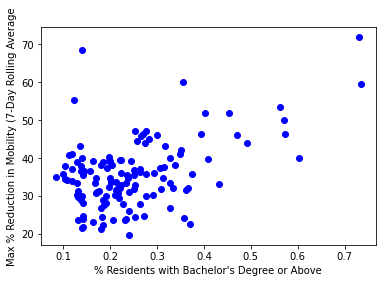

In [92]:
#plot max_mob_red versus pct_bachelors_plus

import matplotlib.pyplot as plt

x=data['pct_bachelors_plus']
y=data['max_mob_reduction']
plt.scatter(x, y, c="blue")
plt.xlabel("% Residents with Bachelor's Degree or Above")
plt.ylabel("Max % Reduction in Mobility (7-Day Rolling Average")

plt.savefig("Q4_plot.jpg")
plt.show()

Text(0, 0.5, 'Max % Reduction in Mobility (7-Day Rolling Average')

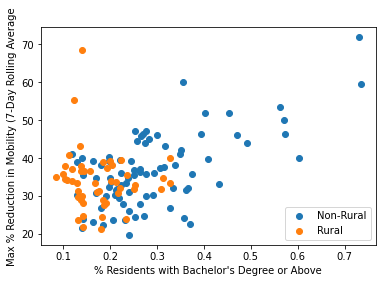

In [93]:
#repeat the plot above, but color points by rural or non-rural

groups = data.groupby('rural_or_non_rural_flag')
for name, group in groups:
    plt.scatter(group.pct_bachelors_plus, group.max_mob_reduction, label = name)

plt.legend()
plt.xlabel("% Residents with Bachelor's Degree or Above")
plt.ylabel("Max % Reduction in Mobility (7-Day Rolling Average")

Text(0, 0.5, 'Max % Reduction in Mobility (7-Day Rolling Average')

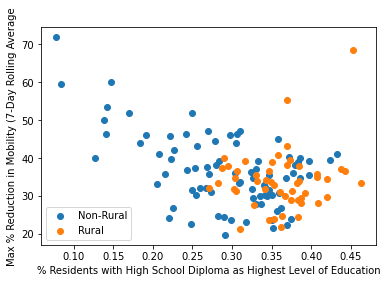

In [94]:
#What happens when we look at % with HS graduation as their highest level of ed attainment?
for name, group in groups:
    plt.scatter(group.pct_high_school_grad_loc, group.max_mob_reduction, label = name)

plt.legend()
plt.xlabel("% Residents with High School Diploma as Highest Level of Education")
plt.ylabel("Max % Reduction in Mobility (7-Day Rolling Average")

Text(0, 0.5, 'Max % Reduction in Mobility (7-Day Rolling Average')

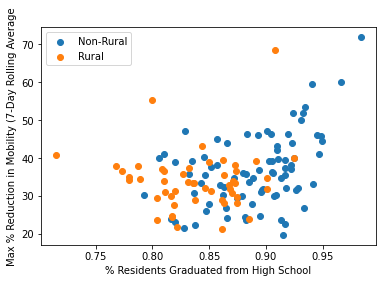

In [95]:
#What happens when we look at the total % who graduated from HS? (Irrespective of max ed attainment)
for name, group in groups:
    plt.scatter(group.pct_HS_grad_total, group.max_mob_reduction, label = name)

plt.legend()
plt.xlabel("% Residents Graduated from High School")
plt.ylabel("Max % Reduction in Mobility (7-Day Rolling Average")

### Q3: Was peak reduction in mobility the same for rural and non-rural counties?

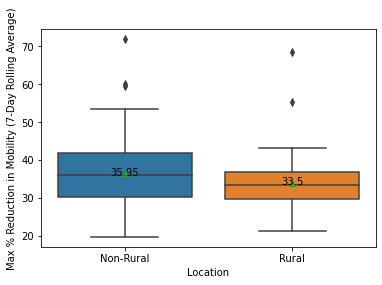

In [97]:
#plot max_mob_red versus rural_or_non_rural_flag

import matplotlib.pyplot as plt
import seaborn as sns

medians = data.groupby('rural_or_non_rural_flag')['max_mob_reduction'].median()

box = sns.boxplot(x=data['rural_or_non_rural_flag'], y=data['max_mob_reduction'], showmeans=True)
for i in range(len(medians)):
    box.annotate(str(round(medians[i], 2)), xy = (i, medians[i]), horizontalalignment = 'center');

plt.xlabel("Location")
plt.ylabel("Max % Reduction in Mobility (7-Day Rolling Average)")

plt.savefig("Q3_plot.jpg")
plt.show()